In [10]:
# bootstrapping du client
from lib.client import Api
import json

from vega import VegaLite
import pandas as pd
import networkx as nx
from ipysigma import Sigma

client = Api()

In [17]:


result = client.toflit.get_flows({
	"columns": [
		"product",
		"region",
		"year",
		"partner",
		"import",
		"value",
		"source"
	],
	"dateMax": 1780,
	"dateMin": 1720,
	"kind": "total",
	"limit": 20000,
	"productClassification": "product_sitc_EN",
	"region": "$all$",
	"skip": 100,
	"sourceType": "Best Guess national product x partner"
})

len(result)

-----------FINAL QUERY-----------
POST http://toflit18.medialab.sciences-po.fr/api/flows/
Content-Length: 0

None
('data', '{\n  "columns": [\n    "product",\n    "region",\n    "year",\n    "partner",\n    "import",\n    "value",\n    "source"\n  ],\n  "dateMax": 1780,\n  "dateMin": 1720,\n  "kind": "total",\n  "limit": 20000,\n  "productClassification": "product_sitc_EN",\n  "region": "$all$",\n  "skip": 100,\n  "sourceType": "Best Guess national product x partner"\n}')


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



20000

In [12]:
def filter_to_larochelle (f):
        print(f)
        if ('direction' in f and f['direction'] == 'La Rochelle'):
            return True
        else:
            return False
        

result = client.portic.get_flows({
    'source_subset' : 'Poitou_1789',
     'params': [ 'travel_rank', 'ship_id', 'departure', 'destination', 'travel_uncertainty', 'distance_dep_dest']
})

print (len(result))

35812


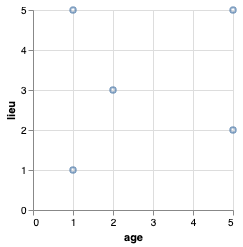

In [14]:
test = [
    {
        "age": 1,
        "lieu": 5
    },
    {
        "age": 2,
        "lieu": 3
    },
    {
        "age": 5,
        "lieu": 5
    },
    {
        "age": 1,
        "lieu": 1
    },
    {
        "age": 5,
        "lieu": 2
    }
]
VegaLite({
    "mark": "point",
    "encoding": {
        "x": {
            "type": "quantitative",
            "field": "age"
        },
        "y": {
            "type": "quantitative",
            "field": "lieu"
        }
    }
}, pd.DataFrame(test))

In [1]:
g = nx.read_gexf('arctic.gexf')
Sigma(g)

NameError: name 'nx' is not defined

In [22]:
data = {
  'nodes': [
    {
      "id": "n0",
      "label": "A node",
      "x": 0,
      "y": 0,
      "size": 3
    },
    {
      "id": "n1",
      "label": "Another node",
      "x": 3,
      "y": 1,
      "size": 2
    },
    {
      "id": "n2",
      "label": "And a last one",
      "x": 1,
      "y": 3,
      "size": 1
    }
  ],
  'edges': [
    {
      "id": "e0",
      "source": "n0",
      "target": "n1"
    },
    {
      "id": "e1",
      "source": "n1",
      "target": "n2"
    },
    {
      "id": "e2",
      "source": "n2",
      "target": "n0"
    }
  ]
}

In [23]:
Sigma(data)

AttributeError: 'dict' object has no attribute 'nodes'

# Tentative Vega : histogramme destinations navigo La Rochelle 1789

In [7]:
result = client.portic.get_flows({ 
    'date':'1789',
    'params': ['destination'],
    # 'departure_ferme_direction': 'La Rochelle'
    })

result_filtered = []
for item in result:
    if 'departure_ferme_direction' in item and item['departure_ferme_direction']=='La Rochelle':
        result_filtered.append(item)

print(result[0:20])

[{'destination': 'Alicant'}, {'destination': 'Aligre de Marans'}, {'destination': 'Amsterdam'}, {'destination': 'Angleterre'}, {'destination': 'Ars en Ré'}, {'destination': 'Arzon'}, {'destination': 'Baltique'}, {'destination': 'Bayonne'}, {'destination': 'Beauvoir-sur-Mer'}, {'destination': 'Bordeaux'}, {'destination': 'Boston'}, {'destination': 'Boulogne sur Mer'}, {'destination': 'Bourcefranc'}, {'destination': 'Bourgneuf'}, {'destination': 'Bremen'}, {'destination': 'Brest'}, {'destination': 'Brusq'}, {'destination': 'Caen'}, {'destination': 'Calais'}, {'destination': 'Chalon'}]


In [14]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
        data: {
          values: [
            {'destination': 'Alicant', 'b':1}, 
            {'destination': 'Aligre de Marans', 'b':1}, 
            {'destination': 'Amsterdam', 'b':1}, 
            {'destination': 'Angleterre', 'b':1}, 
            {'destination': 'Ars en Ré', 'b':1}, 
            {'destination': 'Arzon', 'b':1}, 
            {'destination': 'Baltique', 'b':1}, 
            {'destination': 'Bayonne', 'b':1}, 
            {'destination': 'Beauvoir-sur-Mer', 'b':1},
            {'destination': 'Bordeaux', 'b':1}, 
            {'destination': 'Boston', 'b':1}, 
            {'destination': 'Boulogne sur Mer', 'b':1}, 
            {'destination': 'Bourcefranc', 'b':1},
            {'destination': 'Bourgneuf', 'b':1}, 
            {'destination': 'Bremen', 'b':1}, 
            {'destination': 'Brest', 'b':1}, 
            {'destination': 'Brusq', 'b':1}, 
            {'destination': 'Caen', 'b':1}, 
            {'destination': 'Calais', 'b':1}, 
            {'destination': 'Chalon', 'b':1}
          ]
        },
    
    "title": "Répartition des destinations chez Navigo, pour les flux du sprint",
    "width": 800,
    "mark": "bar",
    
    encoding: {
          y: {field: 'destination', type: 'nominal'},
          x: {
            aggregate: 'average',
            field: 'b',
            type: 'quantitative',
            axis: {
              title: 'number of flows'
            }
          }
    }
}, pd.DataFrame(result_filtered))

NameError: name 'data' is not defined